### **Goal**: yield cargo and fuel carry capacity by vessel type.  

**Vessel types represented in our study:**
  - tanker 
  - atb
  - barge 
  - cargo (container ships, bulk carriers, ...)
  - cruise
  - ferry
  - fishing
  - smallpass (includes any vessel identified in the AIS
as a Passenger vessel, but not as a Ferry or Cruise Ship. Examples of these types of vessels
are whale watch vessels, water taxis, and small tour boats)
  - other (Pilot/Tender, Pleasure Craft, Sailing Vessel, SAR/Military/Police,
High Speed WIG, Anti-Pollution, Dive/Dredge, and Unknown.)

In [1]:
import numpy
import matplotlib.pyplot as plt
from math import exp

### Tankers cargo and fuel 
Capacity, length and hfo_to_diesel from [This website](https://silo.tips/download/suezmax-oil-tanker-tankers-166300-dwt#)
- SuezMax 
    - Length: 281, 
    - Capacity: 5986.7 m3 
    - 4,025/130 m3 for HFO/diesel
- Aframax 
    - Length: 201-250 m, 
    - Capacity: 2,984 m3 
    - 2,822/162 for HFO/diesel
- Handymax 
    - Length: 182 m, 
    - Capacity: 1,956 m3 
    - 1,826/130 m3 for HFO/diesel
- Small Tanker 
    - Length: < 150 m, 
    - Capacity: 740 m3 
    - 687/53 for HFO/diesel

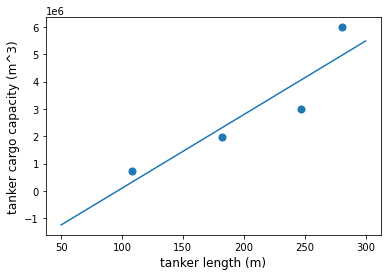

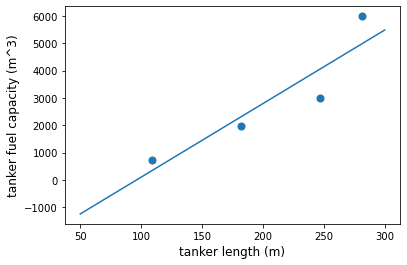

In [2]:
# ~~~ information to be added to master.yaml ~~~~~~~~~~~~~~~~~~~~~~~~~

tanker_min_cargo =  740 # m3
tanker_max_cargo = 5986.7 # m3

tanker_min_fuel = 740 # m3
tanker_max_fuel = 5986.7

tanker_size_classes = [
    'Small Tanker (< 150 m)', 
    'Handymax (151-200 m)', 
    'Aframax (201-250 m)', 
    'SuezMax (251-300 m)' 
]

fuel_hfo_to_diesel = [
    687/53, 
    1826/130, 
    2822/162, 
    4025/130 
]
cargo_capacity = numpy.array([
    740000, 
    1956000, 
    2984000, 
    5986000.7,   
])
fuel_capacity = numpy.array([
    740, 
    1956,
    2984,
    5986.7
])

length = numpy.array([108.5, 182, 247.24, 281])

cargo_fit = numpy.polyfit(
    length, 
    cargo_capacity, 
    1)

fuel_fit = numpy.polyfit(
    length, 
    fuel_capacity, 
    1)

# ~~~ END (information to be added to master.yaml) ~~~~~~~~~~~~~~~~~~~


test_length = range(50, 320, 25)
test_cargo_fit = (
    cargo_fit[1] + 
    cargo_fit[0]*test_length 
)
test_fuel_fit = (
    fuel_fit[1] + 
    fuel_fit[0]*test_length 
)

## plot cargo fit
fig1 = plt.figure()                                                                                           
ax1 = fig1.add_subplot(111)                                                                                   
ax1.scatter(length[:], cargo_capacity[:],50)                                                                     
ax1.plot(test_length, test_cargo_fit)  
plt.xlabel('tanker length (m)',fontsize=12)
plt.ylabel('tanker cargo capacity (m^3)',fontsize=12)
plt.show()

## plot cargo fit
fig2 = plt.figure()                                                                                           
ax1 = fig2.add_subplot(111)                                                                                   
ax1.scatter(length[:], fuel_capacity[:],50)                                                                     
ax1.plot(test_length, test_fuel_fit)  
plt.xlabel('tanker length (m)',fontsize=12)
plt.ylabel('tanker fuel capacity (m^3)',fontsize=12)
plt.show()

### ATB cargo 
Based on information on Harley Marine Services for tank barges that received oil cargo from WA oil refineries 
in 2018, as shown in Dept. of Ecology database.  
See the OilCapacity tab in our [ATB_MMSI spreadsheet]( https://docs.google.com/spreadsheets/d/1dlT0JydkFG43LorqgtHle5IN6caRYjf_3qLrUYqANDY/edit#gid=591561201)

- **Max cargo** Capacity based on Nancy Peterkin, **Kirby 185-01** (185,000 bbls = 28,300.22 m3)
- **Min cargo** capacity based on Harley Marine tank barge **Investigator** (16,007 bbls = 2,544.95 m3)

The [Origin/Destination analysis spreadsheet](https://docs.google.com/spreadsheets/d/1yQk01wImUr_Socihx6JXUgjKvZ5-LeqbdAvqE5hp38I/edit#gid=768387675) shows vessel lengths for oil tank ATBs in AIS ranging from 23 m - 209 m. There are two clear categories: 
1. lengths < 50 m, 
2. lengths > 140 m.  

We treat the former as reflecting lengths of the tug-only and the latter as reflecting lengths of tug-barge coupling.  We reviewed the MMSI for these cases and found no instances in which an MMSI reported sometimes < 50 m and other times as > 140 m (or visa versa).  These different recordings appear to be reliable and specific to a particular MMSI.  


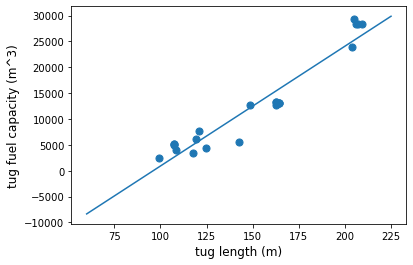

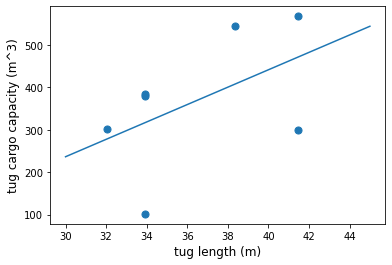

In [3]:
# ~~~ information to be added to master.yaml ~~~~~~~~~~~~~~~~~~~~~~~~~

# min/max lengths

atb_length_threshold = 50 

atb_min_cargo = 2544.95
atb_max_cargo = 29413.15

#longATB_min_fuel = 
#longATB_max_fuel = 

#shortATB_min_fuel = 
#shortATB_min_fuel = 

# ~~~  The following data is for cases with length > 50 m ~~~~~~~~~~~~

# lengths of ATBs > 140 m, in meters
# 34 is added to the lengths for Harley barges as the values listed
# only reflect barge lengths and AIS will record both tug and barge
# The values that don't have 34 m added reflect AIS-recorded lengths
longATB_cargo_legths = [
    65.3796+34, 73.4568+34,
    73.4568+34,73.4568+34,
    74.676+34, 83.8962+34,
    85.0392+34, 86.868+34,
    90.678+34, 108.5088+34, 
    114.3+34, 128.4732+34,
    128.7018+34, 128.7018+34, 
    130.5306+34, 130.5306+34,
    130.5306+34,
    209,
    205,
    207, 
    204,
    206
]

# cargo volume in m^3
longATB_cargo_capacity = [
    2544.95293, 5159.06651, 
    5195.79320, 5069.71413,
    3973.95505, 3461.68927,
    6197.11222, 7685.25862,
    4465.07516, 5609.80316,
    12652.10622, 12791.38146,
    13315.41250, 13315.41250,
    13041.79071, 13009.35675,
    13042.74455,
    28300.22,
    29413.15,
    28300.22,
    23848.5,
    28300.22
]

cargo_fit = numpy.polyfit(
    longATB_cargo_legths, 
    longATB_cargo_capacity, 
    1
) 

# We aren't doing anything with cargo holds right now
# longATB_volume_per_hold = [
#     254.495293, 573.2296122,
#     577.3103556, 563.30157,
#     397.395505, 247.2635193, 
#     476.70094, 548.9470443,
#     744.1791933, 560.980316,
#     903.7218729, 913.6701043, 
#     1109.617708, 1109.617708, 
#     931.5564793, 929.2397679,
#     931.6246179
# ]

#~~~ MARRAIGE PLACEHOLDER ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Cargo volumes from tank barge recorded as < 50 m and "married" 
# to a tank barge
#~~~ END MARRAIGE (it happens) ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# in meters
shortATB_length = [
    33.92424, 33.92424,
    33.92424, 32.06496,
    38.34384, 41.4528,
    41.45
]

# in m^3
shortATB_fuel_capacity = [
    101.38300, 383.77622,
    378.54100, 302.83280,
    545.09904, 567.81150,
    300.00
]

fuel_fit = numpy.polyfit(
    shortATB_length, 
    shortATB_fuel_capacity, 
    1
) 

test_length = range(30,50,5)
test_fuel_fit = ( 
    fuel_fit[1] + 
    fuel_fit[0]*test_length 
)

test_length_long = range(60,230,5)
test_cargo_fit = ( 
    cargo_fit[1] + 
    cargo_fit[0]*test_length_long 
)

## plot fits
fig3 = plt.figure()                                                                                           
ax1 = fig3.add_subplot(111)                                                                                   
ax1.scatter(longATB_cargo_legths[:], longATB_cargo_capacity[:],50)                                                                                                                                        
ax1.plot(test_length_long, test_cargo_fit) 
plt.xlabel('tug length (m)',fontsize=12)
plt.ylabel('tug fuel capacity (m^3)',fontsize=12)
plt.show()

fig4 = plt.figure()                                                                                           
ax1 = fig4.add_subplot(111)                                                                                   
ax1.scatter(shortATB_length[:], shortATB_fuel_capacity[:],50)                                                                                                                                        
ax1.plot(test_length, test_fuel_fit) 
plt.xlabel('tug length (m)',fontsize=12)
plt.ylabel('tug cargo capacity (m^3)',fontsize=12)
plt.show()

In [4]:
# I have DublinSea (DBL-185) listed at 23,848 m3
DublinSea = ( 
    cargo_fit[1] + 
    cargo_fit[0]*204 
)
DublinSea

25003.447387148626

In [5]:
# I have PRIDE listed at 28,000 m3
Pride = ( 
    cargo_fit[1] + 
    cargo_fit[0]*209 
)
Pride

26161.406882712727

### barges
vessel length ranges from 0m to 100m.  There are 36 non-ATB tugs with a reported length of 0m. 6 out of 401 vessels report a length greater than 50m

### cargo

### cruise

### ferry

### fishing

### small pass

### other

## The following is old code that is not yet updated

In [6]:
def get_oil_capacity( vessel_length, vessel_type ):

    if vessel_type == "tanker":
    
        fuel_capacity = ( 111047 * exp( 9.32e-03 * vessel_length )) / 264.172

        if vessel_length < 220:  

            tank_capacity = 301 * vessel_length        

        else:

            tank_capacity = 465 * vessel_length

    elif vessel_type == "atb" or vessel_type == "barge":

        fuel_capacity = (10438 + 5182 * vessel_length + 241 * vessel_length**2) / 264.172
        tank_capacity = (232021 * exp( 0.0246 * vessel_length )) / 264.172

    elif vessel_type == "cargo":

        fuel_capacity = ( 111047 * exp( 9.32e-03 * vessel_length )) / 264.172
        tank_capacity = 0

    elif vessel_type == "cruise":

        fuel_capacity = ( 58271 * exp( 9.97e-03 * vessel_length )) / 264.172
        tank_capacity = 0

    elif vessel_type == "ferry":

        fuel_capacity = ( 1381 * exp( 0.0371 * vessel_length )) / 264.172
        tank_capacity = 0

    elif vessel_type == "fishing":

        fuel_capacity = ( 223 * exp( 0.598 * vessel_length )) / 264.172
        tank_capacity = 0

    elif vessel_type == "smallpass" or vessel_type == "other":

        fuel_capacity = ( 8.05 * vessel_length + 158 ) / 264.172
        tank_capacity = 0

    else:

        print(["Oops! Vessel type isn't valid." + 
           "Today's flavors are: tanker, atb, barge, cargo, cruise, " +
           "ferry, fishing, smallpass, or other.  Go fish!  (or try 'fishing' instead)"])

    fuel_in_liters = 1e3 * fuel_capacity
    tank_in_liters = 1e3 * tank_capacity  

    return fuel_in_liters, tank_in_liters

In [7]:
vessel_types      = ["tanker", "atb", "barge", "cargo", "cruise",
                     "ferry", "fishing", "smallpass", "other"]

for vessel in vessel_types:
    [fuel, tank] = get_oil_capacity(60, vessel)
    print(f'{vessel} [fuel, tank]: {fuel:4.2e} liters, {tank:4.2e} liters')




tanker [fuel, tank]: 7.35e+05 liters, 1.81e+07 liters
atb [fuel, tank]: 4.50e+06 liters, 3.84e+06 liters
barge [fuel, tank]: 4.50e+06 liters, 3.84e+06 liters
cargo [fuel, tank]: 7.35e+05 liters, 0.00e+00 liters
cruise [fuel, tank]: 4.01e+05 liters, 0.00e+00 liters
ferry [fuel, tank]: 4.84e+04 liters, 0.00e+00 liters
fishing [fuel, tank]: 3.23e+18 liters, 0.00e+00 liters
smallpass [fuel, tank]: 2.43e+03 liters, 0.00e+00 liters
other [fuel, tank]: 2.43e+03 liters, 0.00e+00 liters
